In [14]:
import pandas as pd
import numpy as np
import random
rating_dataset = pd.read_csv("ratings.csv")
rating_dataset = rating_dataset.drop(columns =['timestamp'])
rating_dataset.head()
movie_dataset = pd.read_csv("movies.csv")
#movie_dataset.head()
data = pd.merge(rating_dataset,movie_dataset, left_on='movieId',right_on ='movieId',how='left') 
unique_user = np.unique(data['userId'])
count =0 
final_data = pd.DataFrame(columns = ['userId','movieId','rating','title','genres'])
for i in range(len(unique_user)):
    if unique_user[count] <= 100:
        rows = data.loc[data['userId'] == unique_user[count]].head(random.randrange(2, 4))
        new_data = pd.DataFrame(np.array(rows),columns=['userId','movieId','rating','title','genres'])
        final_data = final_data.append(new_data)
        count += 1
    else:
        break
final_data = final_data.reset_index(drop=True)
final_data = final_data.astype({"userId": int, "movieId": int,'rating': float, 'title':str, 'genres':str })    
final_data.to_csv('Final_Dataset.csv',index=False)
final_data.head(6)

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,2,3,4.0,Grumpier Old Men (1995),Comedy|Romance
3,2,62,5.0,Mr. Holland's Opus (1995),Drama
4,2,70,5.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
5,3,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Text(0, 0.5, 'userId')

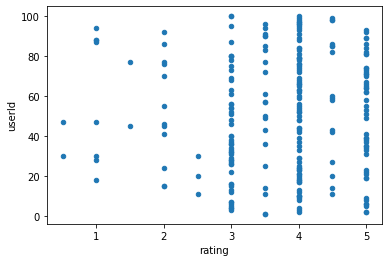

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
#final_data.plot.scatter('rating','userId')

final_data.plot.scatter(x='rating', y='userId')
plt.xlabel('rating')
plt.ylabel('userId')

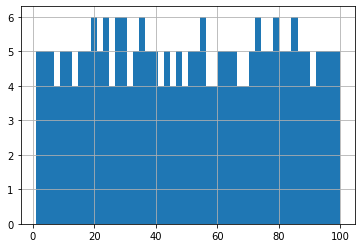

In [16]:
#final_data.plot(kind='hist',x='userId',y='rating')
final_data['userId'].hist(bins= 50)
plt.show()

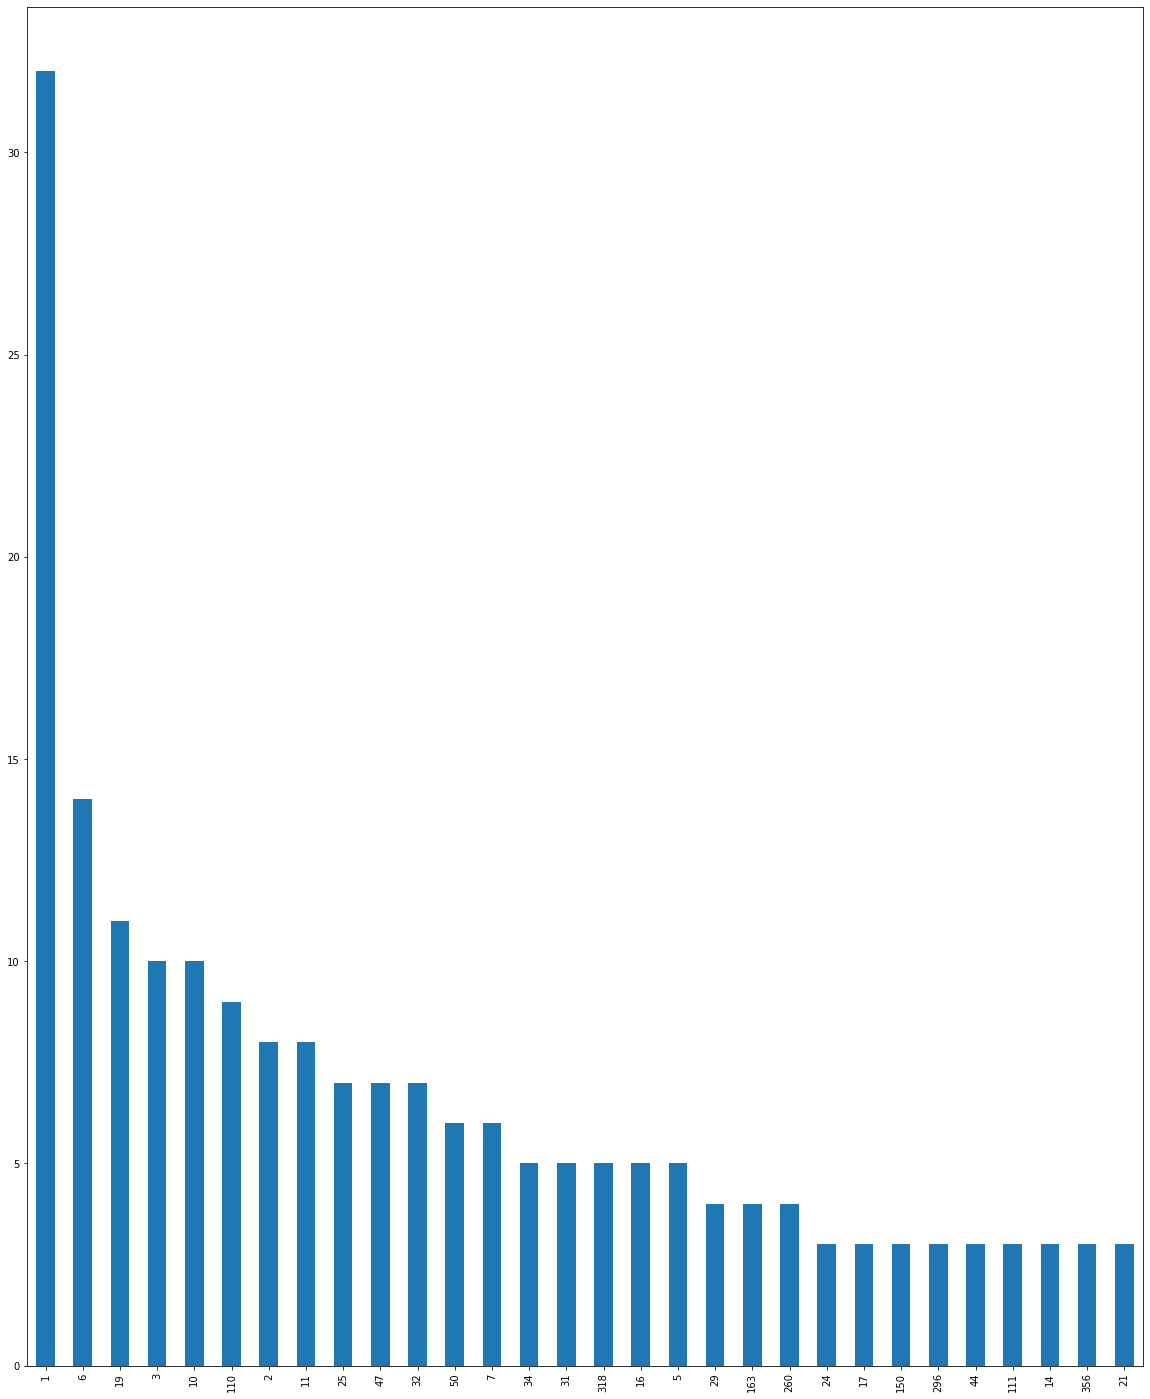

In [17]:
#final_data.plot(kind='hist',x='userId',y='movieId')
#plt.show()
final_data['movieId'].value_counts().head(30).plot(kind='bar',figsize =(20,25))
plt.show()
#final_data.groupby(['userId','movieId']).size().unstack().head(20).plot(kind='bar',stacked=True,figsize=(20,30))
#plt.show()

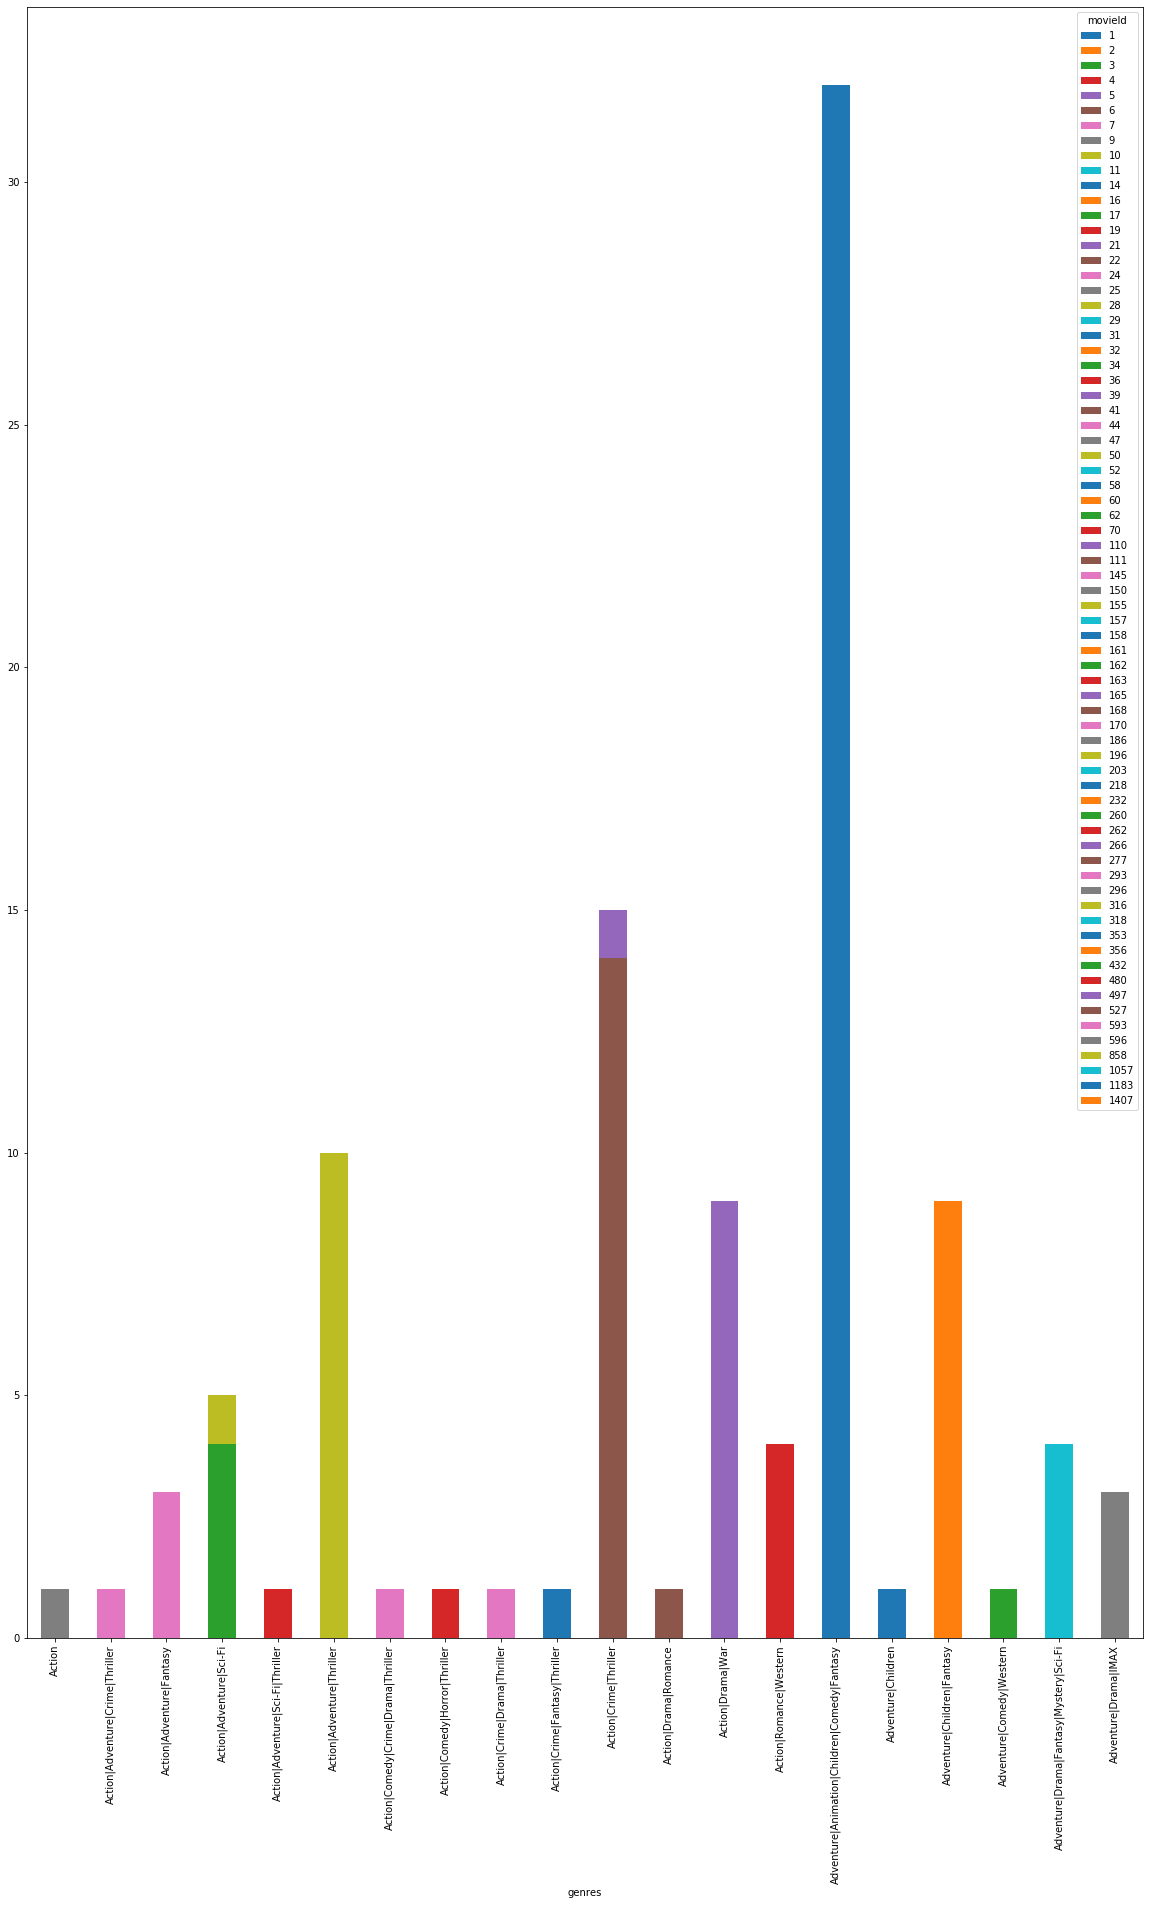

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

final_data.groupby(['genres','movieId']).size().unstack().head(20).plot(kind='bar',stacked=True,figsize=(20,30))
plt.show()

In [21]:
final_data = pd.read_csv("Final_Dataset.csv")

In [22]:
# check if there is any data in any column missing or not available
final_data.isnull().values.any()

False

In [23]:
# find threshold by averging the movie ratings
# get only top5 rated movies per user,threshold is 4.5

maxRating = final_data.loc[final_data['rating'].idxmax()]['rating'] 
toprated_user_movies = final_data.loc[final_data['rating'] >= maxRating/2+1]
toprated_user_movies = toprated_user_movies.sort_values(['userId','rating'],ascending=[True,False])
toprated_user_movies.reset_index(inplace=True, drop=True)
toprated_user_movies.head()

# checking if user has rated a movie multiple times
#toprated_user_movies.duplicated(subset=['userId','movieId'])
# actual data is 20000263 after this step it is 646297

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,2,62,5.0,Mr. Holland's Opus (1995),Drama
3,2,70,5.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
4,2,3,4.0,Grumpier Old Men (1995),Comedy|Romance


In [24]:
#Unique Genres
import pandas as pd
unique_genres_pre = pd.DataFrame(columns=['genres'])
#unique_genres_pre['genres'] = unique_genres_pre['genres'].str.split('|')
unique_genres_pre['genres'] = toprated_user_movies['genres'].unique()
unique_genres_pre['genres'] = unique_genres_pre['genres'].str.split('|')
unique_genres = unique_genres_pre['genres']
print(len(unique_genres))

44


In [25]:
# Break up the big genre string into a string array
toprated_user_movies['genres'] = toprated_user_movies['genres'].str.split('|')
# Convert genres to string value
#toprated_user_movies['genres'] = np.array(toprated_user_movies['genres'])
toprated_user_movies['genres'] = toprated_user_movies['genres'].str.join(',')
toprated_user_movies.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),"Adventure,Children,Fantasy"
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...","Adventure,Drama,Fantasy,Mystery,Sci-Fi"
2,2,62,5.0,Mr. Holland's Opus (1995),Drama
3,2,70,5.0,From Dusk Till Dawn (1996),"Action,Comedy,Horror,Thriller"
4,2,3,4.0,Grumpier Old Men (1995),"Comedy,Romance"


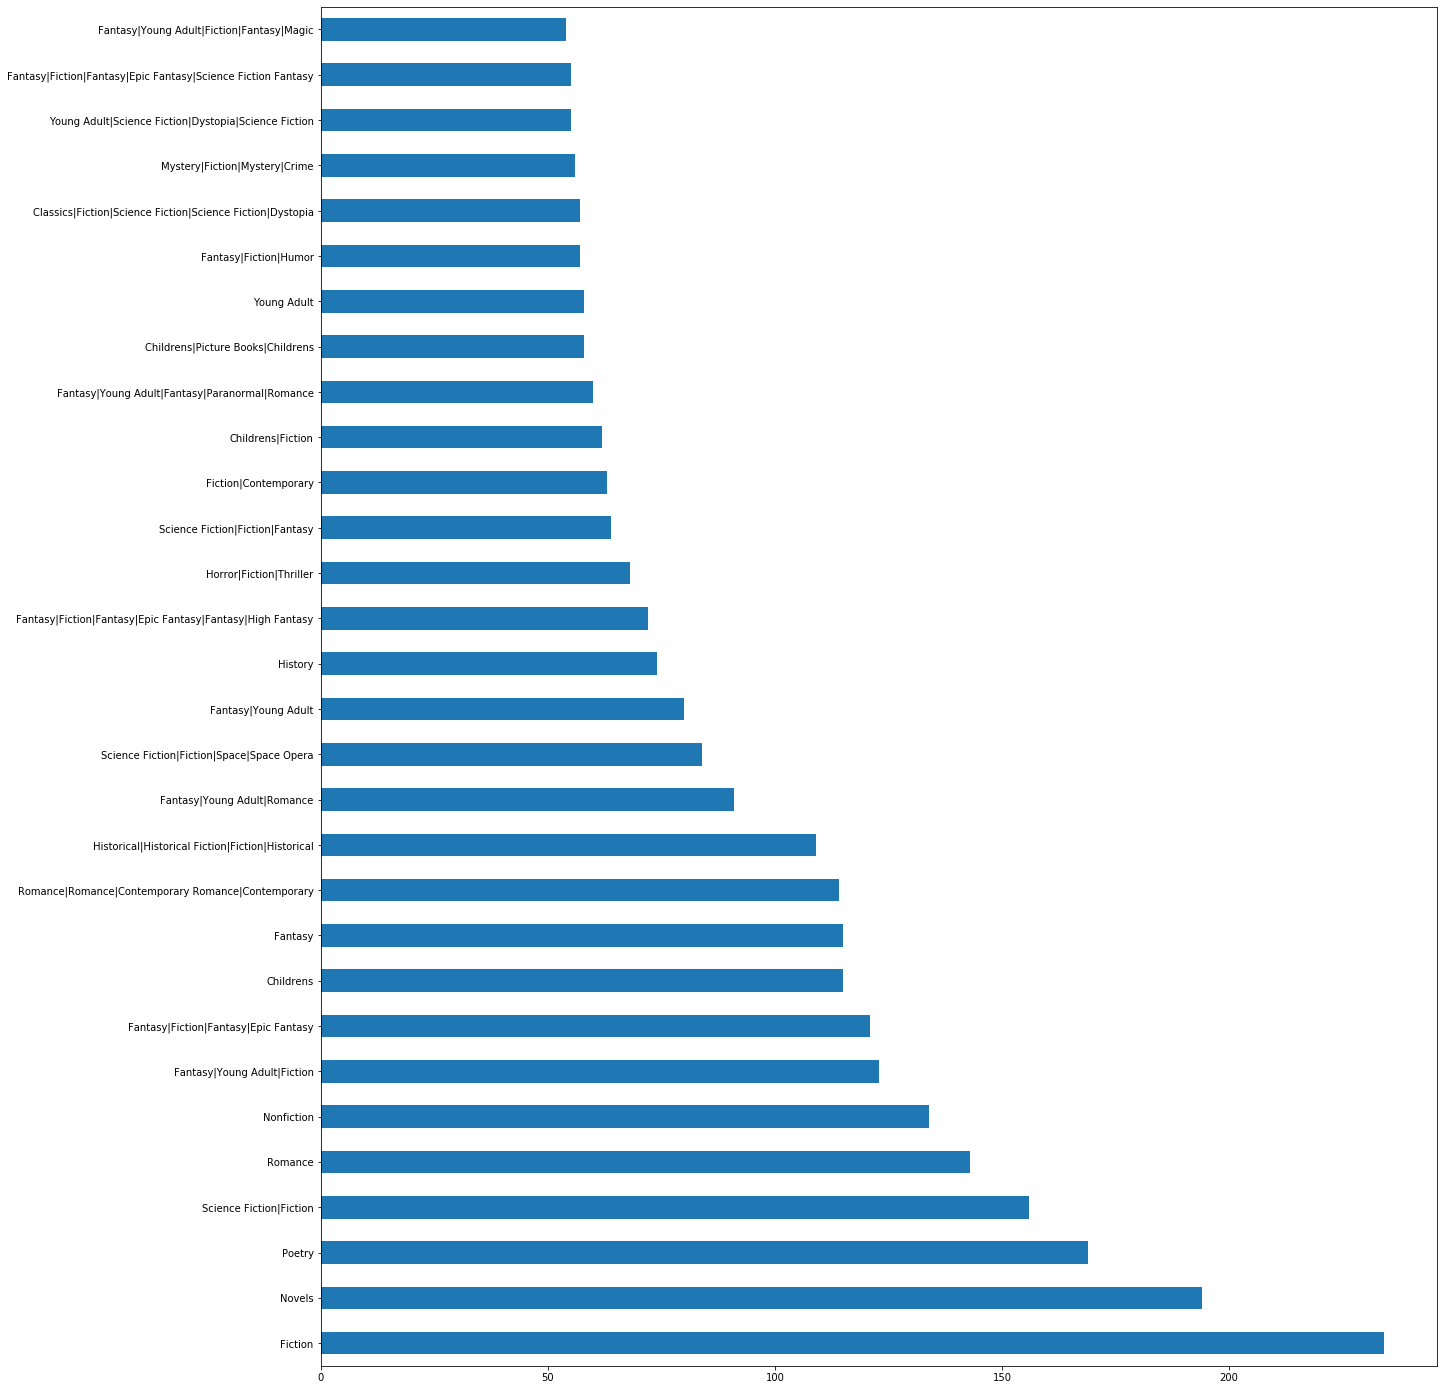

In [26]:
books = pd.read_csv('book_data.csv')
len(books['genres'])
books['genres'].value_counts().head(30).plot(kind='barh',figsize =(20,25))
plt.show()

In [27]:
#target domain
books = pd.read_csv('book_data.csv')
books = books[['book_title','genres','book_rating']]
books = books.dropna(how='any', axis=0)
# Break up the big genre string into a string array
books['genres'] = books['genres'].str.split('|')
# Convert genres to string value
books['genres'] = np.array(books['genres'])

books['length'] = books['genres'].str.len()
books = books.sort_values(['length'])
books = books.drop(columns = ['length'])
maxRating_book = books.loc[books['book_rating'].idxmax()]['book_rating'] 
books = books.loc[books['book_rating'] >= maxRating_book/2+1]
books.reset_index(inplace=True, drop=True)
books.head(5)



,book_title,genres,book_rating
0,الأيام,[Biography],3.53
1,Biological Big Bang: Panspermia and the Origin...,[Nonfiction],4.50
2,Mugglenet.Com's What Will Happen in Harry Pott...,[Nonfiction],4.20
3,"Crónica del rey cautivo (El último Qassatar, #1)",[Fantasy],4.13
4,Here Before Kilroy,[Fiction],5.00


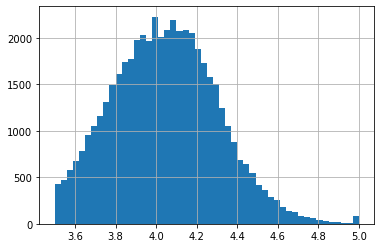

In [28]:
books['book_rating'].hist(bins= 50)

In [30]:
def book_basedon_movie(genre):
    # finding intersecti:on and recommending books
    data = []
   
    book_titles = []
    scores = []
    ratings = []
    book_genres = []
    for i,row in books.iterrows():
        movies_set = set(genre)
        books_set = set(row.genres)
        intersection = movies_set.intersection(books_set)
        book_titles.append(row.book_title)
        ratings.append(row.book_rating)
        #
        book_genres.append(row.genres)
        #
        scores.append(float(len(intersection))/(len(movies_set)+len(books_set)))
    final = pd.DataFrame(columns = ['book_title','score','ratings','book_genres'])
    final['book_title'] = book_titles
    final['score'] = scores
    final['ratings'] = ratings
    final['book_genres'] = book_genres
    return final


#toprated_user_movies['books'] = books_array

#toprated_user_movies.head()




In [31]:
df_books_movies = pd.DataFrame(columns=['genres','books'])
size = len(unique_genres)
books_array = []
genres = []
for i in range(size):
    book_df = book_basedon_movie(unique_genres[i])
    book_df = book_df.sort_values(['score','ratings'],ascending=[False,False]).head(5)
    books_array.append(','.join([str(elem) for elem in book_df['book_title']]))
    genres.append(','.join(unique_genres[i]))
df_books_movies['genres'] = genres
df_books_movies['books'] = books_array
df_books_movies.head()

,genres,books
0,"Adventure,Children,Fantasy",Selections from Harry Potter and the Order of ...
1,"Adventure,Drama,Fantasy,Mystery,Sci-Fi","The 39 Clues Complete Collection,This Book Is ..."
2,Drama,"Miss Perfect,Bluesday,Gabriel's Gate,Diabulus ..."
3,"Action,Comedy,Horror,Thriller","Frostproof,Brazen Violations,Goat Dance,The Gr..."
4,"Comedy,Romance","Shadowed Love,Illusory Love IV,Grosvenor Squar..."


In [32]:
final = pd.merge(toprated_user_movies,df_books_movies, left_on='genres',right_on ='genres',how='left')
final = final.dropna()
final.to_csv('Recommended_Dataset.csv',index=False)
print(final.isnull().values.any())
final.head()

False


,userId,movieId,rating,title,genres,books
0,1,2,3.5,Jumanji (1995),"Adventure,Children,Fantasy",Selections from Harry Potter and the Order of ...
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...","Adventure,Drama,Fantasy,Mystery,Sci-Fi","The 39 Clues Complete Collection,This Book Is ..."
2,2,62,5.0,Mr. Holland's Opus (1995),Drama,"Miss Perfect,Bluesday,Gabriel's Gate,Diabulus ..."
3,2,70,5.0,From Dusk Till Dawn (1996),"Action,Comedy,Horror,Thriller","Frostproof,Brazen Violations,Goat Dance,The Gr..."
4,2,3,4.0,Grumpier Old Men (1995),"Comedy,Romance","Shadowed Love,Illusory Love IV,Grosvenor Squar..."


In [33]:
Output_data = pd.read_csv('Recommended_Dataset.csv')
Output_data['books'] = Output_data['books'].str.split(',')
Output_data.head()

,userId,movieId,rating,title,genres,books
0,1,2,3.5,Jumanji (1995),"Adventure,Children,Fantasy",[Selections from Harry Potter and the Order of...
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...","Adventure,Drama,Fantasy,Mystery,Sci-Fi","[The 39 Clues Complete Collection, This Book I..."
2,2,62,5.0,Mr. Holland's Opus (1995),Drama,"[Miss Perfect, Bluesday, Gabriel's Gate, Diabu..."
3,2,70,5.0,From Dusk Till Dawn (1996),"Action,Comedy,Horror,Thriller","[Frostproof, Brazen Violations, Goat Dance, Th..."
4,2,3,4.0,Grumpier Old Men (1995),"Comedy,Romance","[Shadowed Love, Illusory Love IV, Grosvenor Sq..."


In [34]:
#testing
print(df_books_movies.loc[df_books_movies['genres']=='Adventure,Children,Fantasy'])

                       genres  \
0  Adventure,Children,Fantasy   

                                               books  
0  Selections from Harry Potter and the Order of ...  


In [35]:
book_ds_csv = pd.DataFrame(columns=['userId','books'])
books_array = []
users = []
genres = []
def books_for_users(userID,size):
    book = np.array(Output_data.loc[Output_data['userId']==userID]['books'])
    #genre = np.array(Output_data.loc[Output_data['userId']==userID]['book_genres'])
    for i in range(size):
        users.append(userID)
        books_array.append(book[i])    
        #genres.append(genre[i])
unique_user = np.unique(Output_data['userId'])


      
for j in range(5):
    size = len(Output_data.loc[Output_data['userId']==unique_user[j]]) 
    books_for_users(unique_user[j],size)

book_ds_csv['userId'] = users
book_ds_csv['books'] = books_array
#book_ds_csv['genres'] = genres
book_ds_csv.head()

,userId,books
0,1,[Selections from Harry Potter and the Order of...
1,1,"[The 39 Clues Complete Collection, This Book I..."
2,2,"[Miss Perfect, Bluesday, Gabriel's Gate, Diabu..."
3,2,"[Frostproof, Brazen Violations, Goat Dance, Th..."
4,2,"[Shadowed Love, Illusory Love IV, Grosvenor Sq..."


In [36]:
books.head()

,book_title,genres,book_rating
0,الأيام,[Biography],3.53
1,Biological Big Bang: Panspermia and the Origin...,[Nonfiction],4.50
2,Mugglenet.Com's What Will Happen in Harry Pott...,[Nonfiction],4.20
3,"Crónica del rey cautivo (El último Qassatar, #1)",[Fantasy],4.13
4,Here Before Kilroy,[Fiction],5.00


In [38]:
book_ds_csv.to_csv('Survey_Dataset.csv',index=False)

In [39]:
survey_data = pd.read_excel('Consolidated_Survey_Response.xlsx')
survey_data.head(20)

,UserID,book_title,Actual_Rating
0,1,Selections from Harry Potter and the Order of ...,3.5
1,1,Jeweler's Apprentice,4.4
2,1,Waterwight,5.0
3,1,Heritage of the Xandim,3.3
4,1,Captain Sinbad,5.0
5,1,The 39 Clues Complete Collection,4.2
6,1,This Book Is Not Good for You,3.5
7,1,If You're Reading This,3.8
8,1,It's Too Late,4.8
9,1,The Pretender's Gambit,5.0


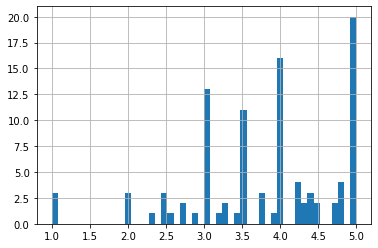

In [40]:
survey_data['Actual_Rating'].hist(bins= 50)

In [41]:
accuracy_score = []
user = []
def estimation_score(userID):
    final_list = list(filter(lambda x: (x>maxRating_book/2+1) , survey_data.loc[survey_data['UserID']==userID]['Actual_Rating']))
    size = len(survey_data.loc[survey_data['UserID']==userID]['Actual_Rating'])
    user.append(userID)
    accuracy_score.append(len(final_list)/size)
users_survey = survey_data['UserID'].unique()
for i in range(len(users_survey)):
    estimation_score(users_survey[i])
    
evaluation_ds = pd.DataFrame(columns=['userId','score'])
evaluation_ds['userId'] = user
evaluation_ds['score'] = accuracy_score
print(evaluation_ds)

   userId     score
0       1  0.636364
1       2  0.562500
2       3  0.500000
3       4  0.400000
4       5  0.200000
5       6  0.900000
6       8  0.900000
7       9  0.400000
8      10  0.500000
9      11  0.500000


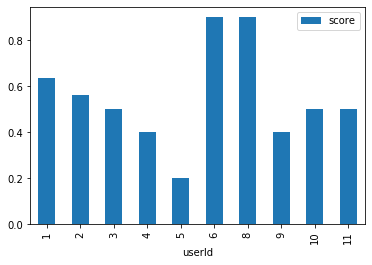

In [42]:
import matplotlib.pyplot as plt
import numpy as np
evaluation_ds.plot.bar(y='score',x = 'userId')

In [46]:
#evaluate_books = pd.DataFrame(columns=['genres','books','book_genres'])
evaluate_books = pd.merge(survey_data,books,left_on='book_title',right_on ='book_title',how='left')
evaluate_books = evaluate_books.drop(columns =['book_rating'])
evaluate_books = evaluate_books.dropna()
evaluate_books.head(40)

,UserID,book_title,Actual_Rating,genres
0,1,Selections from Harry Potter and the Order of ...,3.50,"[Fantasy, Adventure]"
1,1,Jeweler's Apprentice,4.40,"[Fantasy, Adventure]"
2,1,Waterwight,5.00,"[Fantasy, Adventure]"
3,1,Heritage of the Xandim,3.30,"[Fantasy, Adventure]"
4,1,Captain Sinbad,5.00,"[Fantasy, Adventure]"
5,1,The 39 Clues Complete Collection,4.20,"[Mystery, Adventure, Young Adult, Fantasy]"
6,1,This Book Is Not Good for You,3.50,"[Mystery, Fantasy, Adventure, Fiction]"
9,1,The Pretender's Gambit,5.00,"[Fantasy, Fiction, Mystery, Adventure]"
10,1,The Mysterious Benedict Society Collection,3.00,"[Mystery, Young Adult, Fantasy, Adventure, Chi..."
11,2,Miss Perfect,5.00,[Drama]


In [47]:
evaluate_books['genres'] = evaluate_books['genres'].str.join(',')
evaluate_books.head()

,UserID,book_title,Actual_Rating,genres
0,1,Selections from Harry Potter and the Order of ...,3.5,"Fantasy,Adventure"
1,1,Jeweler's Apprentice,4.4,"Fantasy,Adventure"
2,1,Waterwight,5.0,"Fantasy,Adventure"
3,1,Heritage of the Xandim,3.3,"Fantasy,Adventure"
4,1,Captain Sinbad,5.0,"Fantasy,Adventure"


In [48]:
def get_genres(userID):
    genres_of_rec_books = evaluate_books.loc[evaluate_books['UserID']==userID]['genres']
    return genres_of_rec_books
rec_genres_matrix =get_genres(1)

print(rec_genres_matrix)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_kernels

# Finding Cosine similarity between books.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(rec_genres_matrix)
linear_similarity_matrix =  pairwise_kernels(tfidf_matrix, tfidf_matrix, metric='linear')
print(linear_similarity_matrix)

0                                   Fantasy,Adventure
1                                   Fantasy,Adventure
2                                   Fantasy,Adventure
3                                   Fantasy,Adventure
4                                   Fantasy,Adventure
5               Mystery,Adventure,Young Adult,Fantasy
6                   Mystery,Fantasy,Adventure,Fiction
9                   Fantasy,Fiction,Mystery,Adventure
10    Mystery,Young Adult,Fantasy,Adventure,Childrens
Name: genres, dtype: object
[[1.         1.         1.         1.         1.         0.37034828
  0.45351023 0.45351023 0.3057739 ]
 [1.         1.         1.         1.         1.         0.37034828
  0.45351023 0.45351023 0.3057739 ]
 [1.         1.         1.         1.         1.         0.37034828
  0.45351023 0.45351023 0.3057739 ]
 [1.         1.         1.         1.         1.         0.37034828
  0.45351023 0.45351023 0.3057739 ]
 [1.         1.         1.         1.         1.         0.37034828
  

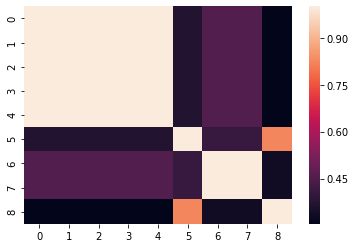

In [49]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.heatmap(linear_similarity_matrix)

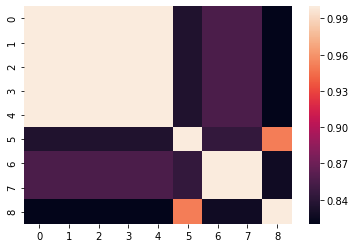

In [50]:
rbf_similarity_matrix =  pairwise_kernels(tfidf_matrix, tfidf_matrix, metric='rbf')
sns.heatmap(rbf_similarity_matrix)

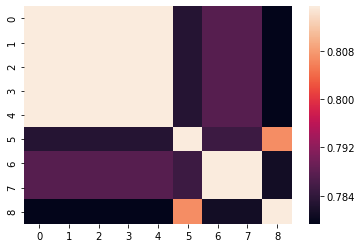

In [51]:
sigmoid_similarity_matrix =  pairwise_kernels(tfidf_matrix, tfidf_matrix, metric='sigmoid')
sns.heatmap(sigmoid_similarity_matrix)

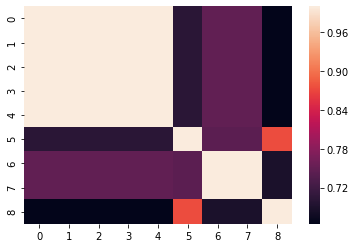

In [52]:
laplacian_similarity_matrix =  pairwise_kernels(tfidf_matrix, tfidf_matrix, metric='laplacian')
sns.heatmap(laplacian_similarity_matrix)